![lsa-concept](lsa_concept.png)

In [1]:
%matplotlib inline

In [2]:
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [3]:
with open('../all_book_titles.txt', 'r') as fid:
    titles = [l.strip() for l in fid.readlines()]

In [4]:
with open('../stopwords.txt', 'r') as fid:
    stopwords = set([
        l.strip() for l in fid.readlines()
    ])

In [5]:
stopwords = stopwords.union({
    "introduction",
    "edition",
    "series",
    "application",
    "approach",
    "card",
    "access",
    "package",
    "plus",
    "etext",
    "brief",
    "vol",
    "fundamental",
    "guide",
    "essential",
    "printed",
    "third",
    "second",
    "fourth",
    '...',
})

In [6]:
import nltk

In [7]:
map_ = lambda f, l: list(map(f, l))
filter_ = lambda f, l: list(filter(f, l))

In [8]:
wn = WordNetLemmatizer()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cnt_vec = CountVectorizer(
    stop_words=stopwords,
    tokenizer=lambda text: filter_(lambda t: len(t) > 2, map_(wn.lemmatize, nltk.tokenize.word_tokenize(text.lower())))
)

In [24]:
X = cnt_vec.fit_transform(titles)

/Users/dboyliao/Documents/MOOCs/Udemy/machine_learning_examples/nlp_class/.venv/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [26]:
X.min()

0

In [27]:
X[X > 0] = 1

In [29]:
X = X.todense()

In [30]:
X.shape

(2373, 2172)

In [31]:
svd = TruncatedSVD()

In [32]:
Z = svd.fit_transform(X.T)

In [33]:
Z.shape

(2172, 2)

In [34]:
import matplotlib.pyplot as plt

In [35]:
index2text_map = {i: name for i, name in enumerate(cnt_vec.get_feature_names())}

In [36]:
len(index2text_map)

2172

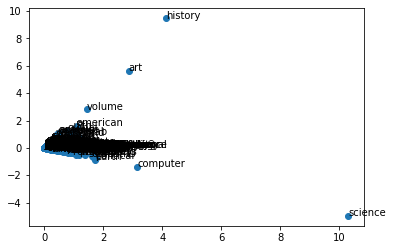

In [37]:
plt.scatter(Z[:, 0], Z[:, 1])
for i in range(Z.shape[0]):
    plt.annotate(s=index2text_map[i], xy=(Z[i, 0], Z[i, 1]))